In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\spam (1).csv", encoding="latin1")



In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#drop last 3 columns 
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
#renaming the columns
data=data.rename(columns={"v1":"target","v2":"text"})

In [12]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


convert ham into 0 and spam into 1

In [14]:
data["target"]=data["target"].map({"ham":0,"spam":1})

In [15]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#check for null value 
data.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicates
data.duplicated().sum()

403

In [18]:
#remove this 
data=data.drop_duplicates(keep="first")

In [19]:
data.duplicated().sum()

0

## EDA

In [21]:
data["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

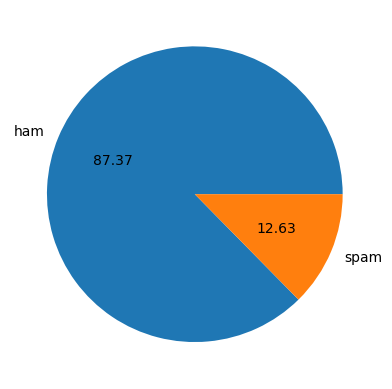

In [22]:
plt.pie(data["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

In [23]:
#means data is imbalanced

In [24]:
!pip install nltk

In [25]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#no of chracter in each text 
data["chracter"]=data["text"].apply(len)

In [27]:
data.head()

,target,text,chracter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
import nltk


nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize


data["words"] = data["text"].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
data.head()

,target,text,chracter,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#sentence in each text 
from nltk.tokenize import sent_tokenize
data["sentence"]=data["text"].apply(lambda x:len(sent_tokenize(x)))

In [31]:
data.head()

,target,text,chracter,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
data.describe()

,target,chracter,words,sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [33]:
data[data["target"]==0][["chracter","words","sentence"]].describe()

,chracter,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#average  chracter in ham message is 70 

In [35]:
data[data["target"]==1][["chracter","words","sentence"]].describe()

,chracter,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


average chracter in spam message is 137

In [37]:
#we use pairplot to see releation between column

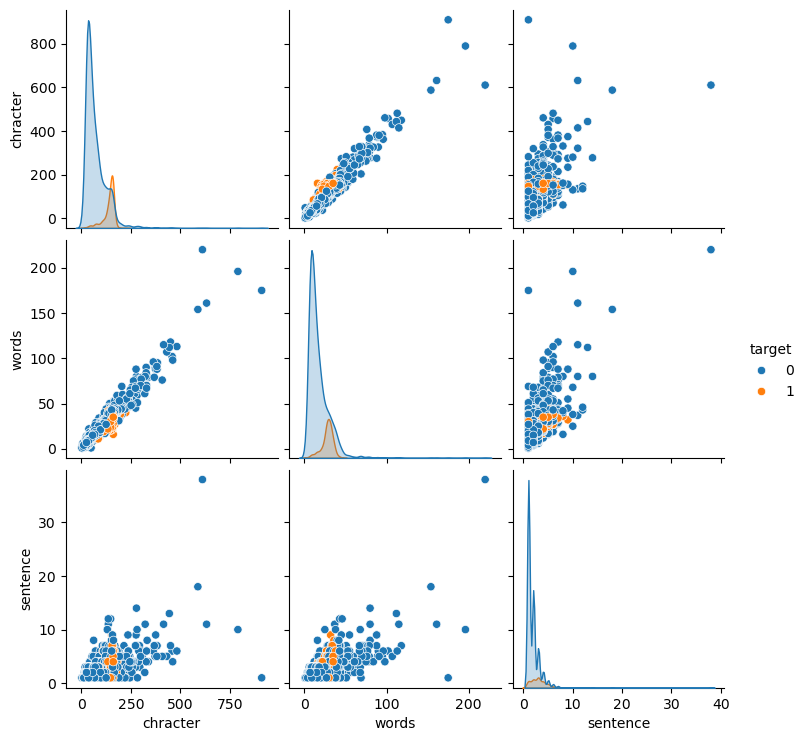

In [38]:
sns.pairplot(data,hue="target")
plt.show()

<Axes: >

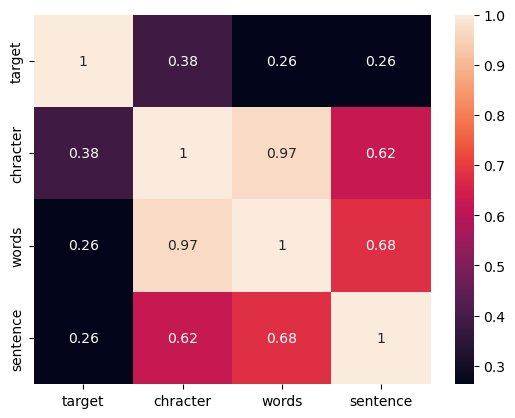

In [39]:
sns.heatmap(data.corr(numeric_only=True),annot=True)


All three columns show strong correlation with each other. Keeping them together could cause multicollinearity,
so we will retain only one and drop the others.” 

## DATA PREPROCESSING

CONVERT INTO LOWER CASE 
REMOVE ALL PUNCTATION AND STOP WORDS 
REMOVE SPECIAL CHRACTERS
TOKENIZATION
STEMMING 

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("running")

'run'

In [44]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not done already
nltk.download('stopwords')

def data_preprocessing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
#stop words and punctation 
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
#stemming
    text=y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y) 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
data_preprocessing("i am very good student i reading the books ")

'good student read book'

In [46]:
data["modified_text"]=data["text"].apply(data_preprocessing)

In [47]:
data.head()

,target,text,chracter,words,sentence,modified_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


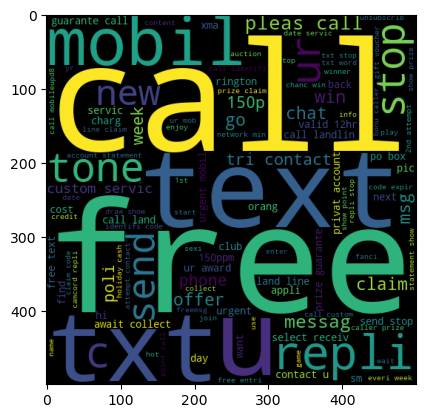

In [48]:
from wordcloud import WordCloud 
wc=WordCloud(width=500,height=500,min_font_size=10)
spam_wc=wc.generate(data[data["target"]==1]["modified_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

## top ham words

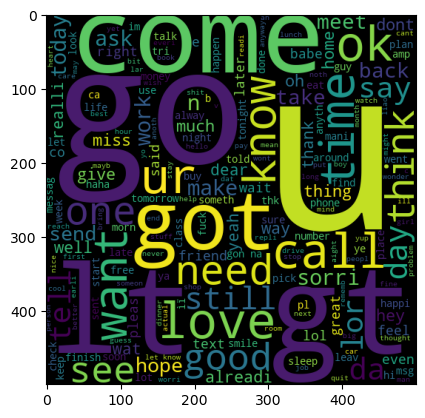

In [50]:
from wordcloud import WordCloud 
wc=WordCloud(width=500,height=500,min_font_size=10)
ham_wc=wc.generate(data[data["target"]==0]["modified_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

## Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(data["modified_text"]).toarray()

In [53]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
Y=data["target"]

In [55]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [56]:
#now lets doo train test split
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.20)

In [57]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score 
mn=MultinomialNB()
gn=GaussianNB()
bn=BernoulliNB()

In [58]:
## MMultinomialNB
mn.fit(X_train,Y_train)
y_pred1=mn.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9738878143133463
0.8881578947368421
[[872  17]
 [ 10 135]]


In [59]:
gn.fit(X_train,Y_train)
y_pred2=gn.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8684719535783365
0.5185185185185185


In [60]:
bn.fit(X_train,Y_train)
y_pred3=bn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]


## now let's use Tf idf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X1=tf.fit_transform(data["modified_text"]).toarray()

In [63]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
x_trains,x_tests,y_trains,y_tests=train_test_split(X1,Y,random_state=42,test_size=0.20)

In [65]:
mn.fit(x_trains,y_trains)
y_preda=mn.predict(x_tests)
print(accuracy_score(y_tests,y_preda))
print(precision_score(y_tests,y_preda))
print(confusion_matrix(y_tests,y_preda))

0.9613152804642167
0.9906542056074766
[[888   1]
 [ 39 106]]


In [66]:
gn.fit(x_trains,y_trains)
y_predb=gn.predict(x_tests)
print(accuracy_score(y_tests,y_predb))
print(precision_score(y_tests,y_predb))
print(confusion_matrix(y_tests,y_predb))

0.8636363636363636
0.5084033613445378
[[772 117]
 [ 24 121]]


In [67]:
bn.fit(x_trains,y_trains)
y_predc=bn.predict(x_tests)
print(accuracy_score(y_tests,y_predc))
print(precision_score(y_tests,y_predc))
print(confusion_matrix(y_tests,y_predc))

0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]


## precision is more important so we keep multinomial nb with tfidf

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd


svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty='l2')  # fixed penalty
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss')

clfs = {
    "SVC": svc,
    "KNN": knc,
    "NB": mnb,
    "DecisionTree": dtc,
    "LogisticRegression": lrc,
    "RandomForest": rfc,
    "AdaBoost": abc,
    "Bagging": bc,
    "GradientBoosting": gbdt,
    "XGBoost": xgb
}


def train_classifier(clf, x_trains, y_trains, x_tests, y_tests):
    clf.fit(x_trains, y_trains)
    y_predss = clf.predict(x_tests)
    acc = accuracy_score(y_tests, y_predss)
    prec = precision_score(y_tests, y_predss, average='binary')  # use 'binary' for 0/1
    return acc, prec




In [145]:
train_classifier(svc,x_trains, y_trains, x_tests, y_tests)

(0.971953578336557, 0.9393939393939394)

In [ ]:
results = []

for name, clf in clfs.items():
    acc, prec = train_classifier(clf, x_trains, y_trains, x_tests, y_tests)
    results.append({"Classifier": name, "Accuracy": acc, "Precision": prec})


results_df = pd.DataFrame(results)
print(results_df)

           Classifier  Accuracy  Precision
0                 SVC  0.971954   0.939394
1                 KNN  0.896518   1.000000
2                  NB  0.961315   0.990654
3        DecisionTree  0.934236   0.803150
4  LogisticRegression  0.948743   0.942308
5        RandomForest  0.970019   0.991379
6            AdaBoost  0.947776   0.842105
7             Bagging  0.962282   0.889706
8    GradientBoosting  0.951644   0.961165
9             XGBoost  0.974855   0.961240
